In [13]:
import numpy as np
import pandas as pd
import scanpy.api as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import re
import copy

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.4.5.post1 anndata==0.7.1 umap==0.3.9 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1


In [14]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
results_prefix=DATA+'/'+PROTEIN+'/processed_data/A549.'+PROTEIN

FIGS=DATA+'/Figures/'
os.system('mkdir -p '+FIGS+'/Main')
os.system('mkdir -p '+FIGS+'/Supplement')

0

Remove obs that are not relevant
--

In [8]:
adata=sc.read(results_prefix+'.raw.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch', 'KRAS_G60D', 'KRAS_Q99E', 'KRAS_L159S', 'KRAS_R164Q', 'KRAS_p.Lys179Ar.536AG', 'KRAS_p.Al66Al.198AG', 'KRAS_T158A', 'KRAS_Q22H', 'KRAS_T50P', 'KRAS_p.Me170Leu.508AT', 'KRAS_G12A', 'KRAS_G13E', 'KRAS_R41K', 'KRAS_A59G', 'KRAS_I36M', 'KRAS_p.Vl8Vl.24AG', 'KRAS_G12S', 'KRAS_Q25H', 'KRAS_V14L', 'KRAS_p.Thr50Thr.150CG', 'KRAS_G12C', 'KRAS_P110S', 'KRAS_A146V', 'KRAS_p.Cys185Tyr.554GA', 'KRAS_R149K', 'KRAS_K5E', 'KRAS_L79I', 'KRAS_p.Lys88Lys.264AG', 'KRAS_p.Al130VlCT', 'KRAS_E63K-', 'KRAS_P34L', 'KRAS_I163S', 'KRAS_T74A', 'KRAS_T144P', 'KRAS_p.Asp173Asp.519TC', 'KRAS_Q22K', 'KRAS_Q61L', 'KRAS_V14I', 'KRAS_H166Y', 'KRAS_Q61A', 'KRAS_AG59GV', 'KRAS_p.Thr20Thr.60GA', 'KRAS_K117R', 'KRAS_E31K', 'KRAS_A59T', 'KRAS_p.Gly77Al.230GC', 'KRAS_T20R', 'KRAS_A146T', 'KRAS_p.Thr144Thr.432AG', 'KRAS_p.Lys178Lys.534AG', 'KRAS_P34R', 'KRAS_p.Asp30Asp.90CT', 'KRAS_K147N', 'KRAS_G12I', 'KRAS_T58I', 'KRAS_p.Al155Gly.464CG', 'KRAS_p.Thr74Thr.

In [10]:
del adata.obs['TP53_p.Pro295Pro']

In [12]:
del adata.obs['Puro_res']

In [13]:
adata

AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch', 'KRAS_G60D', 'KRAS_Q99E', 'KRAS_L159S', 'KRAS_R164Q', 'KRAS_p.Lys179Ar.536AG', 'KRAS_p.Al66Al.198AG', 'KRAS_T158A', 'KRAS_Q22H', 'KRAS_T50P', 'KRAS_p.Me170Leu.508AT', 'KRAS_G12A', 'KRAS_G13E', 'KRAS_R41K', 'KRAS_A59G', 'KRAS_I36M', 'KRAS_p.Vl8Vl.24AG', 'KRAS_G12S', 'KRAS_Q25H', 'KRAS_V14L', 'KRAS_p.Thr50Thr.150CG', 'KRAS_G12C', 'KRAS_P110S', 'KRAS_A146V', 'KRAS_p.Cys185Tyr.554GA', 'KRAS_R149K', 'KRAS_K5E', 'KRAS_L79I', 'KRAS_p.Lys88Lys.264AG', 'KRAS_p.Al130VlCT', 'KRAS_E63K-', 'KRAS_P34L', 'KRAS_I163S', 'KRAS_T74A', 'KRAS_T144P', 'KRAS_p.Asp173Asp.519TC', 'KRAS_Q22K', 'KRAS_Q61L', 'KRAS_V14I', 'KRAS_H166Y', 'KRAS_Q61A', 'KRAS_AG59GV', 'KRAS_p.Thr20Thr.60GA', 'KRAS_K117R', 'KRAS_E31K', 'KRAS_A59T', 'KRAS_p.Gly77Al.230GC', 'KRAS_T20R', 'KRAS_A146T', 'KRAS_p.Thr144Thr.432AG', 'KRAS_p.Lys178Lys.534AG', 'KRAS_P34R', 'KRAS_p.Asp30Asp.90CT', 'KRAS_K147N', 'KRAS_G12I', 'KRAS_T58I', 'KRAS_p.Al155Gly.464CG', 'KRAS_p.Thr74Thr.

In [14]:
adata.write(results_prefix+'.raw.anno.h5ad')

Annotate variants with the standard variant names
--

In [16]:
adata=sc.read(results_prefix+'.raw.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch', 'KRAS_G60D', 'KRAS_Q99E', 'KRAS_L159S', 'KRAS_R164Q', 'KRAS_p.Lys179Ar.536AG', 'KRAS_p.Al66Al.198AG', 'KRAS_T158A', 'KRAS_Q22H', 'KRAS_T50P', 'KRAS_p.Me170Leu.508AT', 'KRAS_G12A', 'KRAS_G13E', 'KRAS_R41K', 'KRAS_A59G', 'KRAS_I36M', 'KRAS_p.Vl8Vl.24AG', 'KRAS_G12S', 'KRAS_Q25H', 'KRAS_V14L', 'KRAS_p.Thr50Thr.150CG', 'KRAS_G12C', 'KRAS_P110S', 'KRAS_A146V', 'KRAS_p.Cys185Tyr.554GA', 'KRAS_R149K', 'KRAS_K5E', 'KRAS_L79I', 'KRAS_p.Lys88Lys.264AG', 'KRAS_p.Al130VlCT', 'KRAS_E63K-', 'KRAS_P34L', 'KRAS_I163S', 'KRAS_T74A', 'KRAS_T144P', 'KRAS_p.Asp173Asp.519TC', 'KRAS_Q22K', 'KRAS_Q61L', 'KRAS_V14I', 'KRAS_H166Y', 'KRAS_Q61A', 'KRAS_AG59GV', 'KRAS_p.Thr20Thr.60GA', 'KRAS_K117R', 'KRAS_E31K', 'KRAS_A59T', 'KRAS_p.Gly77Al.230GC', 'KRAS_T20R', 'KRAS_A146T', 'KRAS_p.Thr144Thr.432AG', 'KRAS_p.Lys178Lys.534AG', 'KRAS_P34R', 'KRAS_p.Asp30Asp.90CT', 'KRAS_K147N', 'KRAS_G12I', 'KRAS_T58I', 'KRAS_p.Al155Gly.464CG', 'KRAS_p.Thr74Thr.

In [17]:
#annotate with oncokb
ANNO='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/'+PROTEIN+'/anno'

anno_known=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.known.csv',sep='\t')
anno_known.index=anno_known['variant_fullname']
print(anno_known.head())


                            variant_fullname variant_std  position  \
variant_fullname                                                     
KRAS_p.Vl112Ile.334GA  KRAS_p.Vl112Ile.334GA       V112I       112   
KRAS_p.Thr20Thr.60GA    KRAS_p.Thr20Thr.60GA        T20T        20   
KRAS_E63K-                        KRAS_E63K-        E63K        63   
KRAS_p.Thr50Thr.150CG  KRAS_p.Thr50Thr.150CG        T50T        50   
KRAS_Q61A                          KRAS_Q61A        Q61A        61   

                            known  color  
variant_fullname                          
KRAS_p.Vl112Ile.334GA        ExAC   gray  
KRAS_p.Thr20Thr.60GA   synonymous  black  
KRAS_E63K-                unknown   gray  
KRAS_p.Thr50Thr.150CG  synonymous  black  
KRAS_Q61A                 unknown   gray  


In [20]:
#annotate group
known=[]
mut_std=[]
for i in range(len(adata.obs_names)):
    g='NA'
    mut=adata.obs['mutant'][i]
    if mut in anno_known.index:
        g=anno_known.loc[mut,'known']
    else:
        if mut=='uninfected' or mut=='multiple':
            g=mut
        else:
            g='unknown'
    known.append(g)
    
    mut_curr='NA'
    if mut in anno_known.index:
        mut_curr=anno_known.loc[mut,'variant_std']
    if g in ['uninfected','multiple']:
        mut_curr=g
    mut_std.append(mut_curr)
adata.obs['known']=known
adata.obs['mut.std']=mut_std

In [23]:
adata.write(results_prefix+'.raw.anno.h5ad')

... storing 'known' as categorical
... storing 'mut.std' as categorical


Ready for filtering
--

In [15]:
adata=sc.read(results_prefix+'.raw.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch', 'KRAS_G60D', 'KRAS_Q99E', 'KRAS_L159S', 'KRAS_R164Q', 'KRAS_p.Lys179Ar.536AG', 'KRAS_p.Al66Al.198AG', 'KRAS_T158A', 'KRAS_Q22H', 'KRAS_T50P', 'KRAS_p.Me170Leu.508AT', 'KRAS_G12A', 'KRAS_G13E', 'KRAS_R41K', 'KRAS_A59G', 'KRAS_I36M', 'KRAS_p.Vl8Vl.24AG', 'KRAS_G12S', 'KRAS_Q25H', 'KRAS_V14L', 'KRAS_p.Thr50Thr.150CG', 'KRAS_G12C', 'KRAS_P110S', 'KRAS_A146V', 'KRAS_p.Cys185Tyr.554GA', 'KRAS_R149K', 'KRAS_K5E', 'KRAS_L79I', 'KRAS_p.Lys88Lys.264AG', 'KRAS_p.Al130VlCT', 'KRAS_E63K-', 'KRAS_P34L', 'KRAS_I163S', 'KRAS_T74A', 'KRAS_T144P', 'KRAS_p.Asp173Asp.519TC', 'KRAS_Q22K', 'KRAS_Q61L', 'KRAS_V14I', 'KRAS_H166Y', 'KRAS_Q61A', 'KRAS_AG59GV', 'KRAS_p.Thr20Thr.60GA', 'KRAS_K117R', 'KRAS_E31K', 'KRAS_A59T', 'KRAS_p.Gly77Al.230GC', 'KRAS_T20R', 'KRAS_A146T', 'KRAS_p.Thr144Thr.432AG', 'KRAS_p.Lys178Lys.534AG', 'KRAS_P34R', 'KRAS_p.Asp30Asp.90CT', 'KRAS_K147N', 'KRAS_G12I', 'KRAS_T58I', 'KRAS_p.Al155Gly.464CG', 'KRAS_p.Thr74Thr.

In [16]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 14754 cells that have less than 200 genes expressed
filtered out 9212 genes that are detected in less than 3 cells


In [17]:
mito_genes = [name for name in adata.var_names if name.startswith('MT-')]
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse to transform to a dense array after summing
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

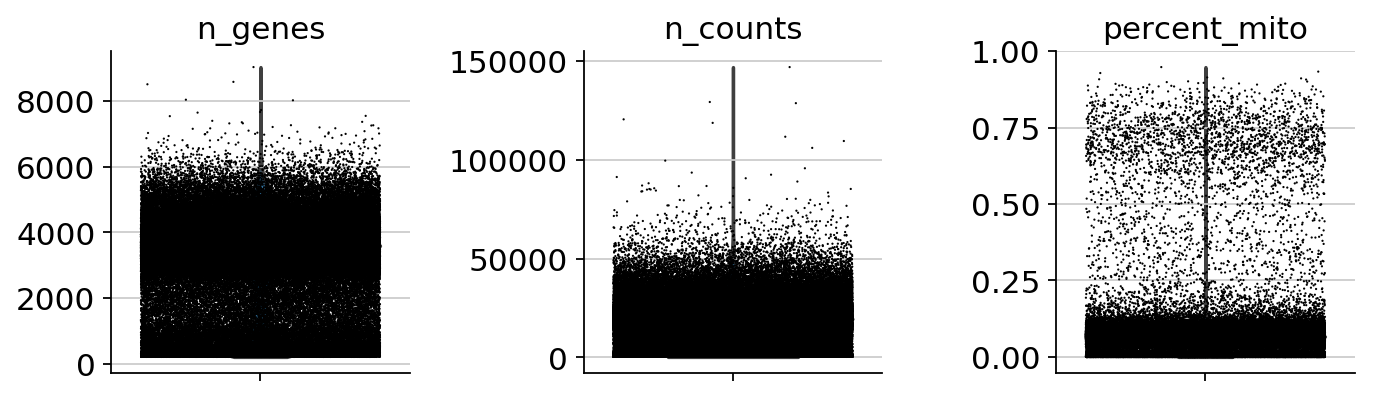

In [18]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True,alpha=0.1)

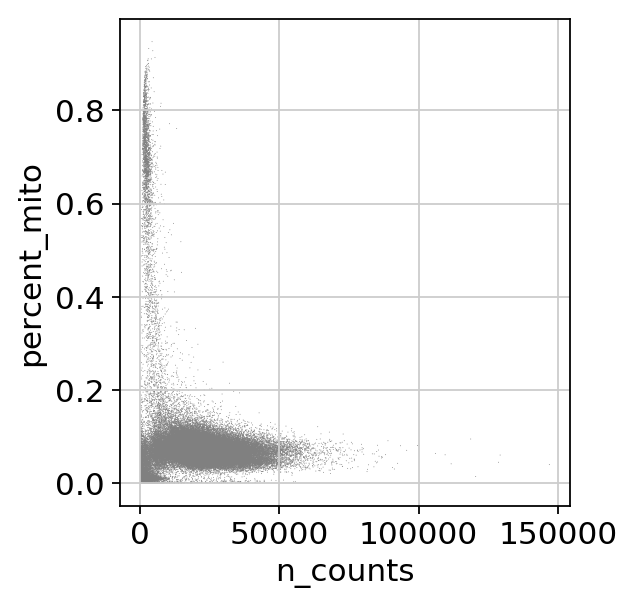

In [19]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')

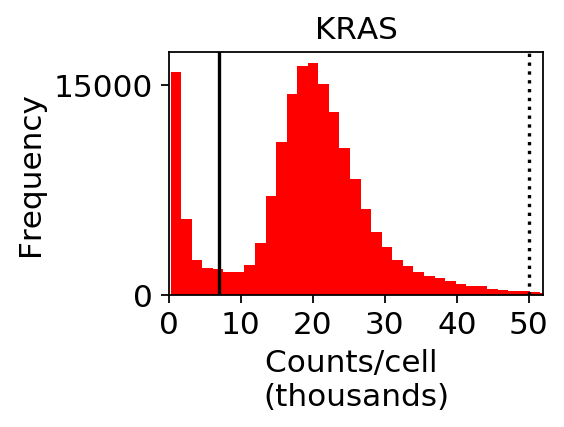

In [20]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(adata.obs['n_counts']/1000,100,
         color='red')
plots.set_xticks([0,10,20,30,40,50])
plots.set_yticks([0,15000])
plots.set_xlim(0,52)
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_ylabel('Frequency')
plots.set_title('KRAS')
plots.axvline(x=7,color='black')
plots.axvline(x=50,linestyle='dotted',color='black')
plots.grid(False)

plt.savefig(FIGS+'/Supplement/KRAS.Counts_hist.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/Supplement/KRAS.Counts_hist.png',bbox_inches = "tight") 

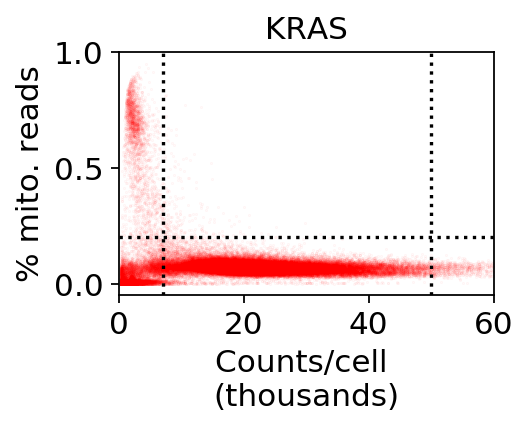

In [21]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.scatter(adata.obs['n_counts']/1000,adata.obs['percent_mito'],
             color='red',s=0.1,alpha=0.05)
plots.set_yticks([0,0.5,1])

#plots.set_yticks([0,0.1,0.2,0.3])
plots.set_xlim(0,60)
#plots.set_xticklabels(['0','5','>10'])
plots.set_ylabel('% mito. reads')
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_title('KRAS')
plots.axhline(y=0.2,linestyle='dotted',color='black')
plots.axvline(x=7,linestyle='dotted',color='black')
plots.axvline(x=50,linestyle='dotted',color='black')

plots.grid(False)
plt.savefig(FIGS+'/Supplement/KRAS.Counts_vs_mito.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/Supplement/KRAS.Counts_vs_mito.png',bbox_inches = "tight")

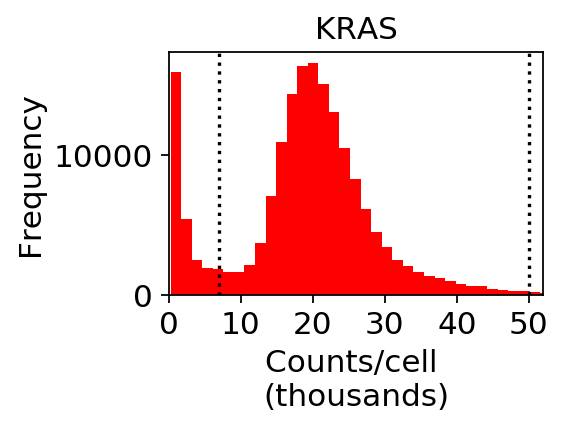

In [22]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(adata.obs['n_counts']/1000,100,
         color='red')
plots.set_xticks([0,10,20,30,40,50])
plots.set_xlim(0,52)
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_ylabel('Frequency')
plots.set_title('KRAS')
plots.axvline(x=7,linestyle='dotted',color='black')
plots.axvline(x=50,linestyle='dotted',color='black')
plots.grid(False)

plt.savefig(FIGS+'/Supplement/KRAS.Counts_hist.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/Supplement/KRAS.Counts_hist.png',bbox_inches = "tight") 

In [51]:
#let's downsample to 50k
sc.pp.downsample_counts(adata, counts_per_cell=50000)

In [52]:
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

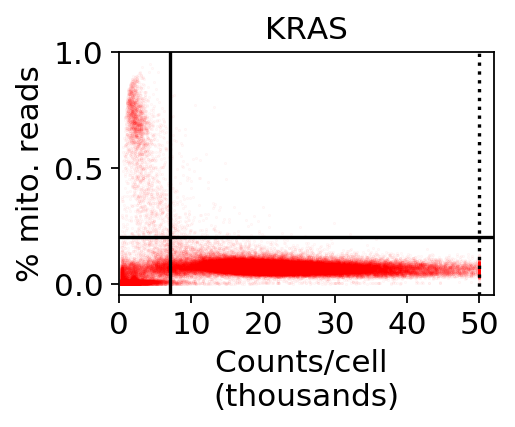

In [53]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.scatter(adata.obs['n_counts']/1000,adata.obs['percent_mito'],
             color='red',s=0.1,alpha=0.05)
plots.set_yticks([0,0.5,1])

plots.set_xlim(0,52)
plots.set_xticks([0,10,20,30,40,50])
plots.set_ylabel('% mito. reads')
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_title('KRAS')
plots.axhline(y=0.2,color='black')
plots.axvline(x=7,color='black')
plots.axvline(x=50,linestyle='dotted',color='black')

plots.grid(False)
plt.savefig(FIGS+'/Supplement/KRAS.Counts_vs_mito_after_downsampling.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/Supplement/KRAS.Counts_vs_mito_after_downsampling.png',bbox_inches = "tight")

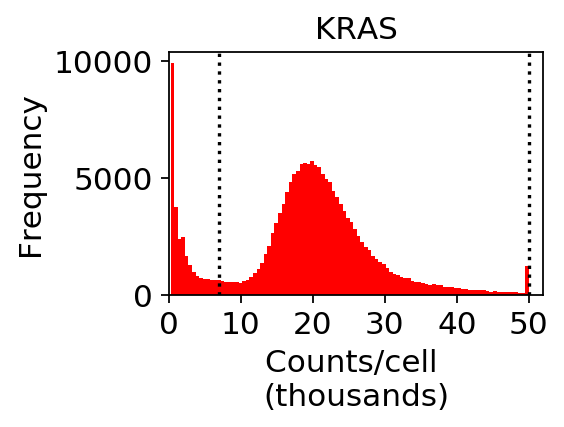

In [54]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(adata.obs['n_counts']/1000,100,
         color='red')
plots.set_xticks([0,10,20,30,40,50])
plots.set_xlim(0,52)
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_ylabel('Frequency')
plots.set_title('KRAS')
plots.axvline(x=7,linestyle='dotted',color='black')
plots.axvline(x=50,linestyle='dotted',color='black')
plots.grid(False)

plt.savefig(FIGS+'/Supplement/KRAS.Counts_hist_after_downsampling.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/Supplement/KRAS.Counts_hist_after_downsampling.png',bbox_inches = "tight") 

In [40]:
adata = adata[adata.obs['n_counts'] > 7000, :]
adata = adata[adata.obs['n_counts'] <= 50000, :]
adata = adata[adata.obs['percent_mito'] < 0.2, :]
print(adata)

View of AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'batch', 'KRAS_G60D', 'KRAS_Q99E', 'KRAS_L159S', 'KRAS_R164Q', 'KRAS_p.Lys179Ar.536AG', 'KRAS_p.Al66Al.198AG', 'KRAS_T158A', 'KRAS_Q22H', 'KRAS_T50P', 'KRAS_p.Me170Leu.508AT', 'KRAS_G12A', 'KRAS_G13E', 'KRAS_R41K', 'KRAS_A59G', 'KRAS_I36M', 'KRAS_p.Vl8Vl.24AG', 'KRAS_G12S', 'KRAS_Q25H', 'KRAS_V14L', 'KRAS_p.Thr50Thr.150CG', 'KRAS_G12C', 'KRAS_P110S', 'KRAS_A146V', 'KRAS_p.Cys185Tyr.554GA', 'KRAS_R149K', 'KRAS_K5E', 'KRAS_L79I', 'KRAS_p.Lys88Lys.264AG', 'KRAS_p.Al130VlCT', 'KRAS_E63K-', 'KRAS_P34L', 'KRAS_I163S', 'KRAS_T74A', 'KRAS_T144P', 'KRAS_p.Asp173Asp.519TC', 'KRAS_Q22K', 'KRAS_Q61L', 'KRAS_V14I', 'KRAS_H166Y', 'KRAS_Q61A', 'KRAS_AG59GV', 'KRAS_p.Thr20Thr.60GA', 'KRAS_K117R', 'KRAS_E31K', 'KRAS_A59T', 'KRAS_p.Gly77Al.230GC', 'KRAS_T20R', 'KRAS_A146T', 'KRAS_p.Thr144Thr.432AG', 'KRAS_p.Lys178Lys.534AG', 'KRAS_P34R', 'KRAS_p.Asp30Asp.90CT', 'KRAS_K147N', 'KRAS_G12I', 'KRAS_T58I', 'KRAS_p.Al155Gly.464CG', 'KRAS_p.T

In [41]:
adata.write(results_prefix+'.raw.filt.anno.h5ad')

In [3]:
adata=sc.read(results_prefix+'.raw.filt.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'batch', 'KRAS_G60D', 'KRAS_Q99E', 'KRAS_L159S', 'KRAS_R164Q', 'KRAS_p.Lys179Ar.536AG', 'KRAS_p.Al66Al.198AG', 'KRAS_T158A', 'KRAS_Q22H', 'KRAS_T50P', 'KRAS_p.Me170Leu.508AT', 'KRAS_G12A', 'KRAS_G13E', 'KRAS_R41K', 'KRAS_A59G', 'KRAS_I36M', 'KRAS_p.Vl8Vl.24AG', 'KRAS_G12S', 'KRAS_Q25H', 'KRAS_V14L', 'KRAS_p.Thr50Thr.150CG', 'KRAS_G12C', 'KRAS_P110S', 'KRAS_A146V', 'KRAS_p.Cys185Tyr.554GA', 'KRAS_R149K', 'KRAS_K5E', 'KRAS_L79I', 'KRAS_p.Lys88Lys.264AG', 'KRAS_p.Al130VlCT', 'KRAS_E63K-', 'KRAS_P34L', 'KRAS_I163S', 'KRAS_T74A', 'KRAS_T144P', 'KRAS_p.Asp173Asp.519TC', 'KRAS_Q22K', 'KRAS_Q61L', 'KRAS_V14I', 'KRAS_H166Y', 'KRAS_Q61A', 'KRAS_AG59GV', 'KRAS_p.Thr20Thr.60GA', 'KRAS_K117R', 'KRAS_E31K', 'KRAS_A59T', 'KRAS_p.Gly77Al.230GC', 'KRAS_T20R', 'KRAS_A146T', 'KRAS_p.Thr144Thr.432AG', 'KRAS_p.Lys178Lys.534AG', 'KRAS_P34R', 'KRAS_p.Asp30Asp.90CT', 'KRAS_K147N', 'KRAS_G12I', 'KRAS_T58I', 'KRAS_p.Al155Gly.464CG', 'KRAS_p.Thr74Thr.

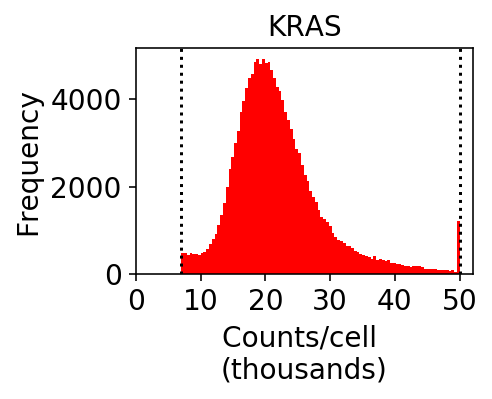

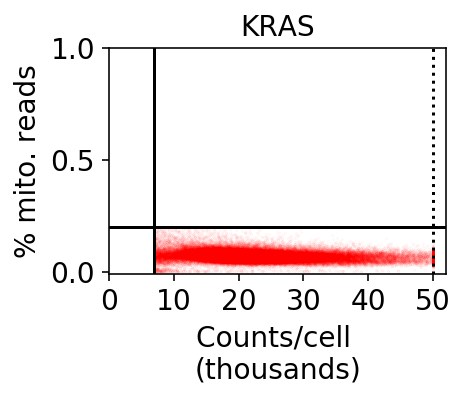

In [4]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(adata.obs['n_counts']/1000,100,
         color='red')
plots.set_xticks([0,10,20,30,40,50])
plots.set_xlim(0,52)
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_ylabel('Frequency')
plots.set_title('KRAS')
plots.axvline(x=7,linestyle='dotted',color='black')
plots.axvline(x=50,linestyle='dotted',color='black')
plots.grid(False)

plt.savefig(FIGS+'/Supplement/KRAS.Counts_hist_after_downsampling.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/Supplement/KRAS.Counts_hist_after_downsampling.png',bbox_inches = "tight")

fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.scatter(adata.obs['n_counts']/1000,adata.obs['percent_mito'],
             color='red',s=0.1,alpha=0.05)
plots.set_yticks([0,0.5,1])

plots.set_xlim(0,52)
plots.set_xticks([0,10,20,30,40,50])
plots.set_ylabel('% mito. reads')
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_title('KRAS')
plots.axhline(y=0.2,color='black')
plots.axvline(x=7,color='black')
plots.axvline(x=50,linestyle='dotted',color='black')

plots.grid(False)
plt.savefig(FIGS+'/Supplement/KRAS.Counts_vs_mito_after_downsampling.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/Supplement/KRAS.Counts_vs_mito_after_downsampling.png',bbox_inches = "tight")